In [1]:
# Step 1: Install the Kaggle library
!pip install -q kaggle

In [2]:

# Step 2: Upload the kaggle.json file (This will prompt you to choose your file)
from google.colab import files
files.upload()

# Step 3: Move kaggle.json to the proper directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Step 4: Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Step 5: Download the dataset
# This is the specific dataset URL and ID you provided from Kaggle
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

# Step 6: Unzip the downloaded dataset
!unzip ham1000-segmentation-and-classification.zip -d ./ham1000_data

Streaming output truncated to the last 5000 lines.
  inflating: ./ham1000_data/masks/ISIC_0029321_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029322_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029323_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029324_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029325_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029326_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029327_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029328_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029329_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029330_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029331_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029332_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029333_segmentation.png  
  inflating: ./ham1000_data/masks/ISIC_0029334_segmentation.png  
  inflating: ./ham1000_da

In [3]:



# Verify the contents
import os
os.listdir('./ham1000_data')


['masks', 'GroundTruth.csv', 'images']

In [4]:
import pandas as pd

df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import os
import shutil
import pandas as pd

# Load the ground truth data
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Define paths
source_folder = '/content/ham1000_data/images'
destination_folder = '/content/ham1000_data/classified_images'

# Create destination folders for each class
classes = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
for class_name in classes:
    os.makedirs(os.path.join(destination_folder, class_name), exist_ok=True)

# Iterate over each row in the dataframe and move files based on class labels
for index, row in df.iterrows():
    # Get image name and class labels
    image_name = row['image'] + '.jpg'
    image_path = os.path.join(source_folder, image_name)

    # Move image to the corresponding class folder based on label
    for class_name in classes:
        if row[class_name] == 1.0:  # If the label is 1 for the class
            dest_path = os.path.join(destination_folder, class_name, image_name)
            shutil.copy(image_path, dest_path)  # Copy image to the respective folder

print("Images have been separated into respective class folders.")


Images have been separated into respective class folders.


<ipython-input-8-c294a97a9841>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=class_counts_df, palette="viridis")


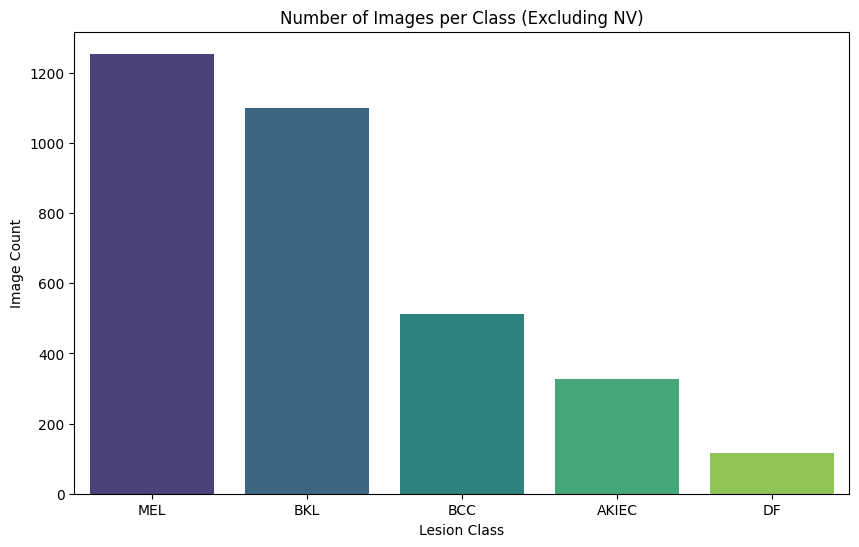

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ground truth data
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Drop the 'nv' class by filtering out its rows
df['class'] = df.iloc[:, 1:-1].idxmax(axis=1)  # Add 'class' column for the target label
df_filtered = df[df['class'] != 'NV']  # Remove rows where 'class' is 'nv'

# Count the number of images per class
class_counts = df_filtered['class'].value_counts()  # Count the number of occurrences for each class

# Convert to DataFrame for easier plotting
class_counts_df = class_counts.reset_index()
class_counts_df.columns = ['Class', 'Image Count']

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Image Count', data=class_counts_df, palette="viridis")
plt.title('Number of Images per Class (Excluding NV)')
plt.xlabel('Lesion Class')
plt.ylabel('Image Count')
plt.show()


In [9]:
class_counts

,count
class,
MEL,1255
BKL,1099
BCC,514
AKIEC,327
DF,115


In [7]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [26]:
# Load ground truth CSV
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Add column 'class' for the target label
df['class'] = df.iloc[:, 1:].idxmax(axis=1)
# Step 4: Filter out rows where the class is "nv" (assuming the class column contains 'nv' for Nevi)
df = df[df['class'] != 'NV']
# Split into train and test data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)


In [27]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,class
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKL
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
12,ISIC_0024318,0.0,0.0,0.0,0.0,0.0,1.0,0.0,DF
...,...,...,...,...,...,...,...,...,...
10007,ISIC_0034313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
10009,ISIC_0034315,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BKL
10010,ISIC_0034316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
10011,ISIC_0034317,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3310 entries, 4 to 10012
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   3310 non-null   object 
 1   MEL     3310 non-null   float64
 2   NV      3310 non-null   float64
 3   BCC     3310 non-null   float64
 4   AKIEC   3310 non-null   float64
 5   BKL     3310 non-null   float64
 6   DF      3310 non-null   float64
 7   VASC    3310 non-null   float64
 8   class   3310 non-null   object 
dtypes: float64(7), object(2)
memory usage: 258.6+ KB


In [29]:
# Define data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Set image directory path
image_dir = '/content/ham1000_data/classified_images'

# Flow images from directory using data generator
train_generator = train_datagen.flow_from_dataframe(
    train_df, directory=image_dir, x_col='image', y_col='class',
    target_size=(128, 128), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    test_df, directory=image_dir, x_col='image', y_col='class',
    target_size=(128, 128), batch_size=32, class_mode='categorical')


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2648 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 662 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [30]:
# Load ground truth CSV
df = pd.read_csv('/content/ham1000_data/GroundTruth.csv')

# Step 1: Update the 'image' column to contain the full path to each image
df['image'] = '/content/ham1000_data/images/' + df['image'] + '.jpg'  # <-- Update the path here if necessary

# Add column 'class' for the target label by selecting the column with the highest value
df['class'] = df.iloc[:, 1:-1].idxmax(axis=1)  # Assuming class labels start from column 1 to the second-last column
df = df[df['class'] != 'NV']
# Check if paths are valid (for debugging)
print(df['image'].head())  # Print first few paths to check format
print(all([os.path.exists(path) for path in df['image']]))  # Check if paths are valid

# Step 2: Split into train and test data based on the 'class' column
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)

# Step 3: Set up ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image",
    y_col="class",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


4     /content/ham1000_data/images/ISIC_0024310.jpg
6     /content/ham1000_data/images/ISIC_0024312.jpg
7     /content/ham1000_data/images/ISIC_0024313.jpg
9     /content/ham1000_data/images/ISIC_0024315.jpg
12    /content/ham1000_data/images/ISIC_0024318.jpg
Name: image, dtype: object
True
Found 2648 validated image filenames belonging to 5 classes.
Found 662 validated image filenames belonging to 5 classes.


In [31]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

In [32]:

# Step 4: Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(df['class'].unique()), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

# Step 6: Evaluate the model
# Predict on test data
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=-1)
true_classes = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.3667 - loss: 1.8000 - val_accuracy: 0.4290 - val_loss: 1.2844
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 374s 4s/step - accuracy: 0.4606 - loss: 1.2458 - val_accuracy: 0.5106 - val_loss: 1.1798
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 349s 4s/step - accuracy: 0.5176 - loss: 1.1492 - val_accuracy: 0.5272 - val_loss: 1.1474
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.5600 - loss: 1.0684 - val_accuracy: 0.5000 - val_loss: 1.1459
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.5651 - loss: 1.0563 - val_accuracy: 0.5378 - val_loss: 1.1394
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 354s 4s/step - accuracy: 0.5954 - loss: 0.9745 - val_accuracy: 0.5227 - val_loss: 1.2802
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.6404 - loss: 0.9107 - val_accuracy: 0.5393 - val_loss: 1.1859
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.6749 - loss: 0.8348 - val_accuracy: 0.5982 - val_loss: 1.

In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained features
base_model.trainable = False

# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)  # Assuming 7 classes

model_vgg16 = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet.trainable = False

x = base_model_resnet.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(6, activation='softmax')(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=output)
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [35]:
from tensorflow.keras.applications import InceptionV3

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_inception.trainable = False

x = base_model_inception.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(6, activation='softmax')(x)

model_inception = Model(inputs=base_model_inception.input, outputs=output)
model_inception.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#  VGG16
history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    batch_size=32,
    
)


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import shutil

# Define dataset directory
dataset_path = "/content/ham1000_data/classified_images"
filtered_dataset_path = "/content/ham1000_data/classified_images_filtered"

# Create a filtered dataset directory without 'NV'
if not os.path.exists(filtered_dataset_path):
    os.makedirs(filtered_dataset_path)
    for class_name in os.listdir(dataset_path):
        if class_name != "NV":  # Exclude the 'NV' class
            source_dir = os.path.join(dataset_path, class_name)
            target_dir = os.path.join(filtered_dataset_path, class_name)
            shutil.copytree(source_dir, target_dir)

# Parameters
img_height, img_width = 224, 224  # Resize images
batch_size = 32
epochs = 20

# Load filtered dataset
train_dataset = image_dataset_from_directory(
    filtered_dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    filtered_dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Define class names
class_names = train_dataset.class_names
print("Filtered Classes:", class_names)


Found 3310 files belonging to 6 classes.
Using 2648 files for training.
Found 3310 files belonging to 6 classes.
Using 662 files for validation.
Filtered Classes: ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'VASC']


In [40]:

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Build a CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Generate predictions
y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Found 3310 files belonging to 6 classes.
Using 2648 files for training.
Found 3310 files belonging to 6 classes.
Using 662 files for validation.
Filtered Classes: ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'VASC']
Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.3567 - loss: 1.7854 - val_accuracy: 0.4804 - val_loss: 1.3197
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.5031 - loss: 1.2247 - val_accuracy: 0.5514 - val_loss: 1.2103
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 399s 4s/step - accuracy: 0.5623 - loss: 1.1033 - val_accuracy: 0.5619 - val_loss: 1.1388
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.6048 - loss: 0.9936 - val_accuracy: 0.5483 - val_loss: 1.1170
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.6401 - loss: 0.9097 - val_accuracy: 0.5665 - val_loss: 1.1070
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.6883 - loss: 0.8152 - val_accuracy: 0.5740 - val_loss: 1.1809
Epoch 7/20
83/83 ━━━━━━━━━━━━━

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Function to train and compute confusion matrix
def train_pretrained_model(base_model, preprocess_fn, train_dataset, val_dataset, class_names, epochs=10, fine_tune_epochs=5):
    # Preprocess datasets
    train_ds = train_dataset.map(lambda x, y: (preprocess_fn(x), y))
    val_ds = val_dataset.map(lambda x, y: (preprocess_fn(x), y))

    # Prefetch datasets
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

    # Freeze base model initially
    base_model.trainable = False

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print(f"\nTraining with {base_model.name} (frozen)...")
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    # Fine-tune the model
    base_model.trainable = True
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"\nFine-tuning with {base_model.name}...")
    fine_tune_history = model.fit(train_ds, validation_data=val_ds, epochs=fine_tune_epochs)

    # Merge history objects
    for key in fine_tune_history.history.keys():
        history.history[key].extend(fine_tune_history.history[key])

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(val_ds)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    # Generate predictions and compute confusion matrix
    y_true, y_pred = [], []
    for images, labels in val_ds:
        predictions = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(predictions, axis=1))

    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {base_model.name}:")
    print(conf_matrix)

    # Classification Report
    print(f"\nClassification Report for {base_model.name}:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return history, conf_matrix, base_model.name


# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [16]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """
    Plots training and validation accuracy and loss from the model's history.

    Args:
        history: The history object returned by model.fit().
        model_name: Name of the model, used for the plot title.
    """
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [14]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0, VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg

# Define models and preprocess functions
models_to_train = {
    "ResNet50": (ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_resnet),
    "EfficientNetB0": (EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_efficientnet),
    "VGG16": (VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)), preprocess_vgg)
}


58889256/58889256 [==============================] - 0s 0us/step



Training with resnet50 (frozen)...
Epoch 1/10
83/83 [==============================] - 58s 662ms/step - loss: 0.6859 - accuracy: 0.7591 - val_loss: 0.8985 - val_accuracy: 0.6873
Epoch 2/10
83/83 [==============================] - 53s 633ms/step - loss: 0.2673 - accuracy: 0.9067 - val_loss: 1.0787 - val_accuracy: 0.6843
Epoch 3/10
83/83 [==============================] - 53s 640ms/step - loss: 0.1912 - accuracy: 0.9339 - val_loss: 1.0399 - val_accuracy: 0.7115
Epoch 4/10
83/83 [==============================] - 54s 643ms/step - loss: 0.1413 - accuracy: 0.9517 - val_loss: 1.1586 - val_accuracy: 0.7085
Epoch 5/10
83/83 [==============================] - 53s 638ms/step - loss: 0.1201 - accuracy: 0.9581 - val_loss: 1.1254 - val_accuracy: 0.7175
Epoch 6/10
83/83 [==============================] - 52s 627ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 1.2211 - val_accuracy: 0.7190
Epoch 7/10
83/83 [==============================] - 54s 643ms/step - loss: 0.0564 - accuracy: 0.9819 - val

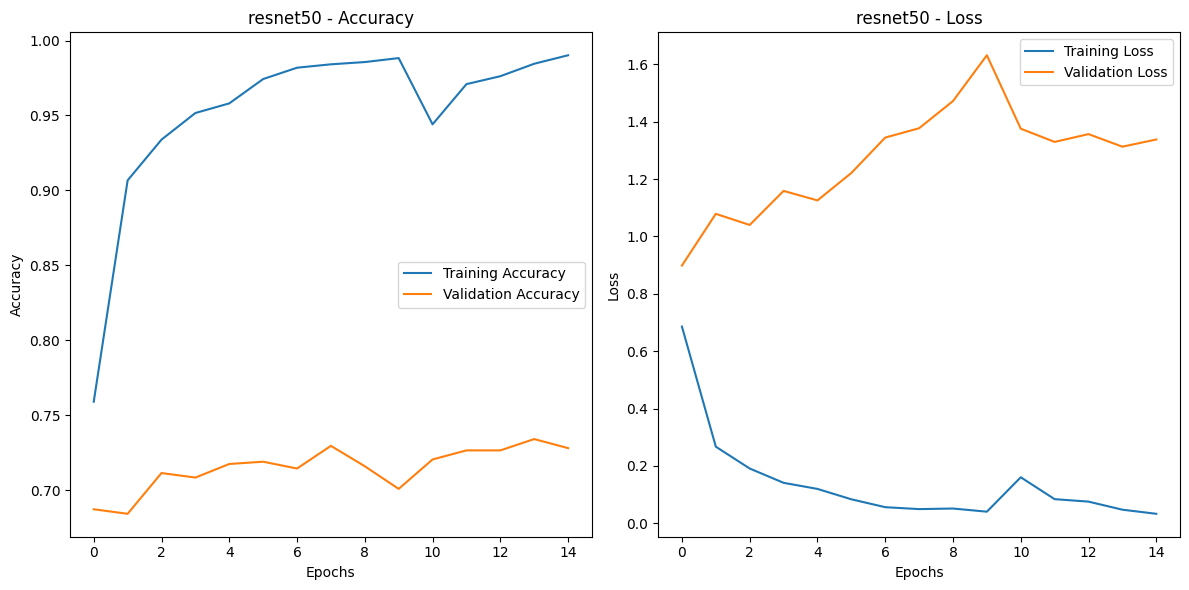

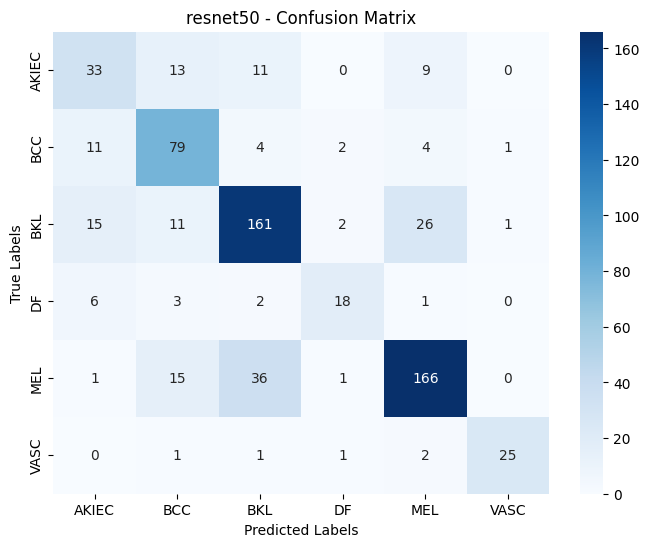


Training with efficientnetb0 (frozen)...
Epoch 1/10
83/83 [==============================] - 42s 426ms/step - loss: 1.2885 - accuracy: 0.4683 - val_loss: 1.1127 - val_accuracy: 0.5453
Epoch 2/10
83/83 [==============================] - 33s 402ms/step - loss: 1.0258 - accuracy: 0.5899 - val_loss: 0.9982 - val_accuracy: 0.6042
Epoch 3/10
83/83 [==============================] - 33s 394ms/step - loss: 0.9465 - accuracy: 0.6231 - val_loss: 0.9491 - val_accuracy: 0.6239
Epoch 4/10
83/83 [==============================] - 32s 388ms/step - loss: 0.8666 - accuracy: 0.6654 - val_loss: 0.9310 - val_accuracy: 0.6299
Epoch 5/10
83/83 [==============================] - 31s 374ms/step - loss: 0.8156 - accuracy: 0.6786 - val_loss: 0.8823 - val_accuracy: 0.6647
Epoch 6/10
83/83 [==============================] - 34s 406ms/step - loss: 0.7621 - accuracy: 0.6892 - val_loss: 0.8677 - val_accuracy: 0.6616
Epoch 7/10
83/83 [==============================] - 32s 392ms/step - loss: 0.7392 - accuracy: 0.7039

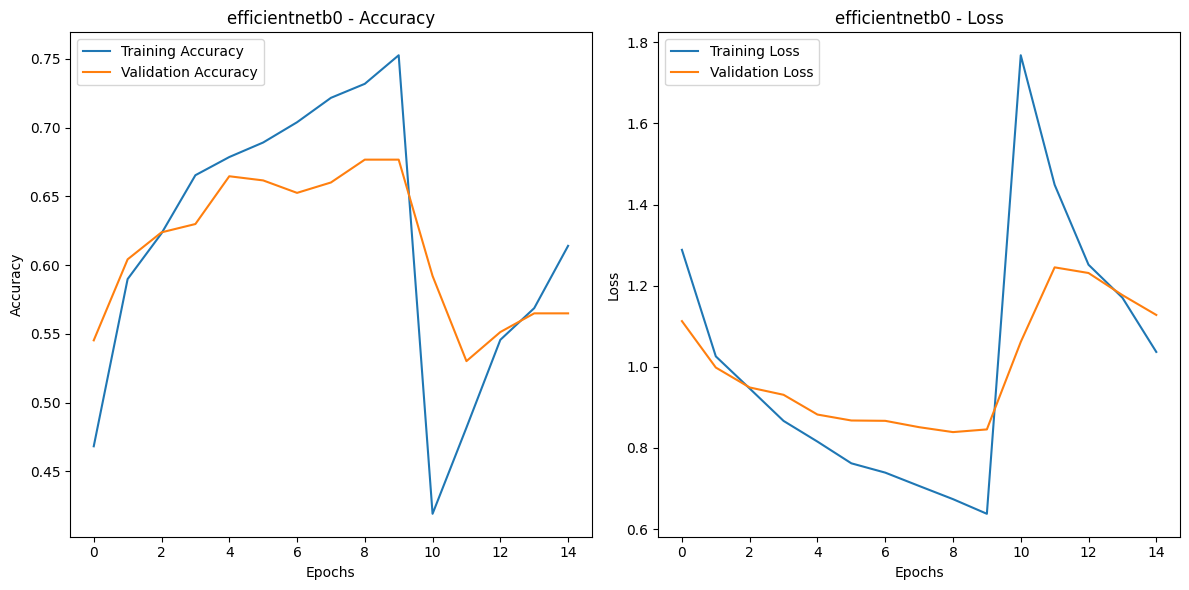

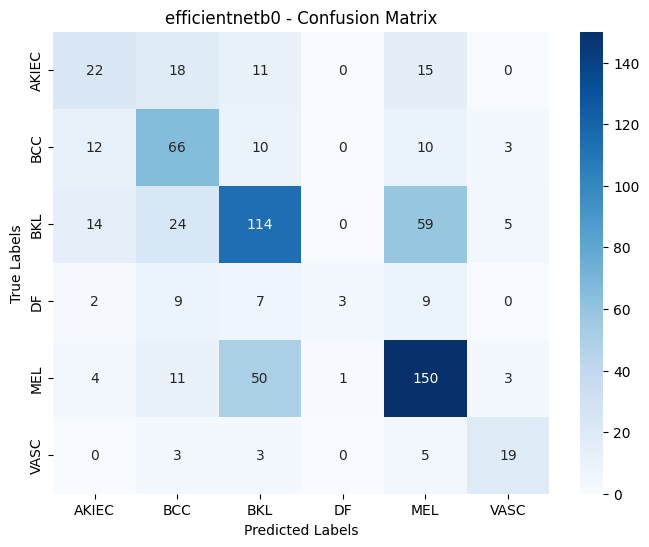


Training with vgg16 (frozen)...
Epoch 1/10
83/83 [==============================] - 61s 727ms/step - loss: 1.9692 - accuracy: 0.4022 - val_loss: 1.2268 - val_accuracy: 0.5498
Epoch 2/10
83/83 [==============================] - 59s 709ms/step - loss: 1.2102 - accuracy: 0.5242 - val_loss: 1.1453 - val_accuracy: 0.5891
Epoch 3/10
83/83 [==============================] - 59s 709ms/step - loss: 1.0480 - accuracy: 0.5869 - val_loss: 1.0979 - val_accuracy: 0.5755
Epoch 4/10
83/83 [==============================] - 60s 715ms/step - loss: 1.0014 - accuracy: 0.6027 - val_loss: 1.0554 - val_accuracy: 0.6012
Epoch 5/10
83/83 [==============================] - 59s 702ms/step - loss: 0.9130 - accuracy: 0.6450 - val_loss: 1.0219 - val_accuracy: 0.6042
Epoch 6/10
83/83 [==============================] - 58s 699ms/step - loss: 0.8429 - accuracy: 0.6696 - val_loss: 1.0179 - val_accuracy: 0.6103
Epoch 7/10
83/83 [==============================] - 58s 695ms/step - loss: 0.8187 - accuracy: 0.6764 - val_lo

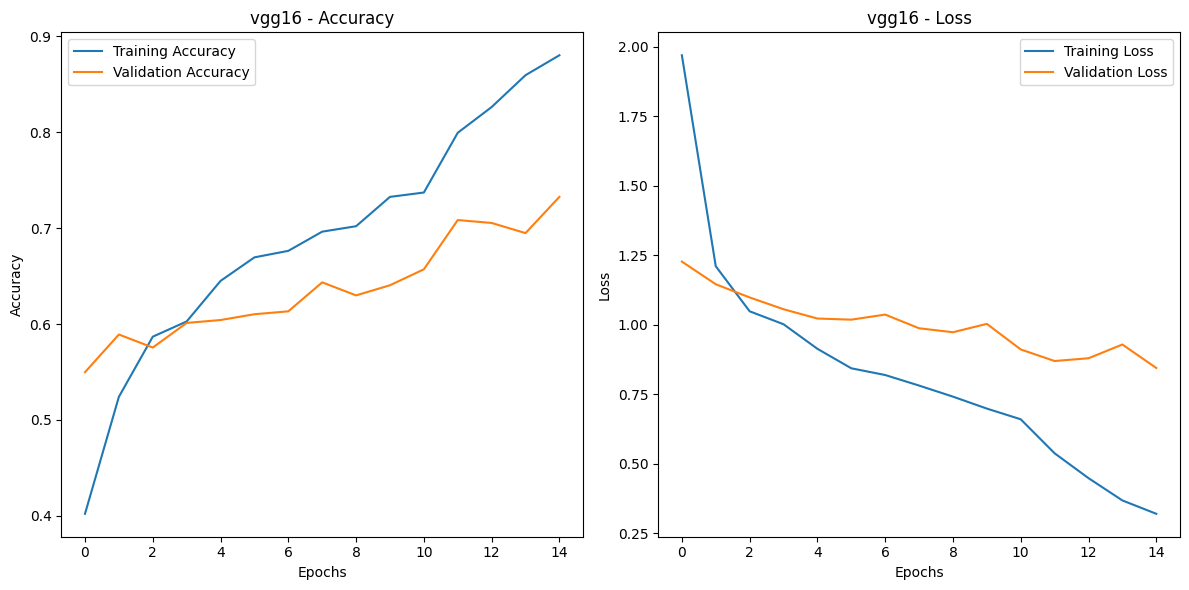

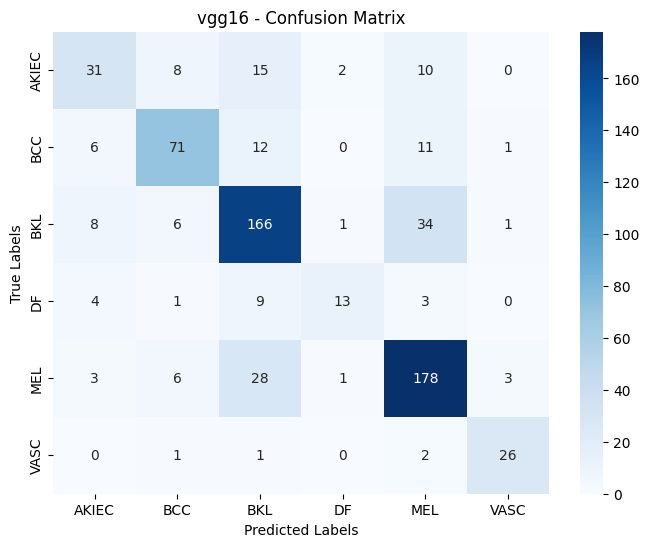

In [17]:
# Train each model, plot history and confusion matrix
for model_name, (base_model, preprocess_fn) in models_to_train.items():
    history, conf_matrix, trained_model_name = train_pretrained_model(
        base_model, preprocess_fn, train_dataset, val_dataset, train_dataset.class_names
    )
    # Plot accuracy and loss history
    plot_history(history, trained_model_name)
    # Plot confusion matrix
    plot_confusion_matrix(conf_matrix, train_dataset.class_names, trained_model_name)
